In [19]:
from __future__ import print_function
#Author: Avikal Somvanshi
import pylab as pl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
#GENERATING 100 samples of different sizes N (N>10 & N<2000) 
import random
np.random.seed(229)
df = 100
sample = random.sample(range(10, 2000), 100)
print (sample, shape(sample))
distributions = {} 

[203, 772, 1145, 1951, 89, 1701, 375, 433, 681, 213, 42, 1501, 1878, 466, 991, 106, 1968, 596, 460, 1648, 1472, 1402, 1582, 335, 473, 317, 531, 122, 334, 1064, 155, 1425, 958, 1379, 592, 1491, 1115, 1606, 1489, 1768, 1385, 645, 454, 1916, 770, 1436, 319, 185, 332, 519, 14, 482, 887, 617, 1417, 181, 226, 171, 792, 333, 624, 825, 1911, 428, 623, 605, 1261, 1517, 241, 1471, 806, 88, 472, 1796, 599, 748, 1578, 272, 1135, 353, 978, 860, 323, 1193, 1124, 1834, 1099, 126, 1814, 814, 1155, 768, 1815, 1943, 1125, 1050, 224, 762, 1475, 1894] (100,)


Chi squared Distribution 

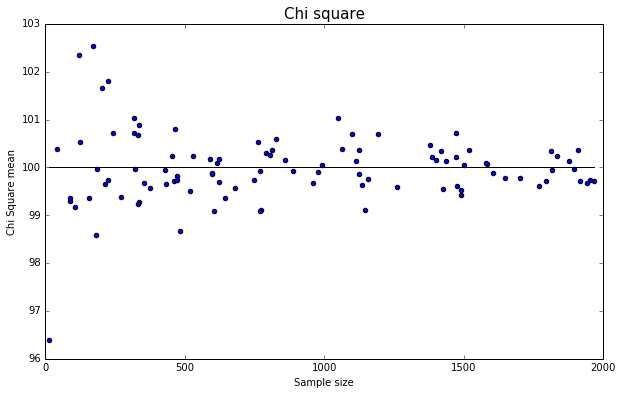

In [21]:
def chisqrandom(df, s):
    return np.random.chisquare(df, size = s).mean()

chisq_mean = [chisqrandom(df, s) for s in sample]

distributions['chisq'] = chisq_mean

pl.figure(figsize=(10, 6))
pl.scatter(sample, chisq_mean)
pl.ylabel('Chi Square mean')
pl.xlabel('Sample size')
pl.xlim(0,2000)
pl.title('Chi square', size = 15)  
pl.plot([min(sample), max(sample)], [df, df], 'k')


In [46]:
print ('Figure1: The Chi square plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem')

Figure1: The Chi square plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem


Chisq mean:  99.9875446704
Standard deviation:  0.739429563367


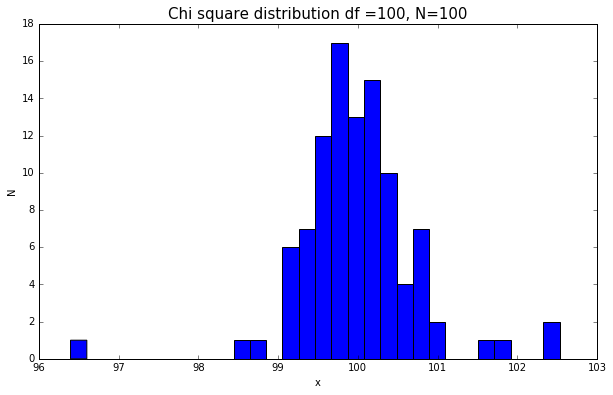

In [23]:
pl.figure(figsize=(10, 6))
pl.hist(distributions['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi square distribution df =100, N=100', size = 15) 
print ('Chisq mean: ', np.mean(distributions['chisq']))
print ('Standard deviation: ', np.std(distributions['chisq']))

Poisson Distribution 

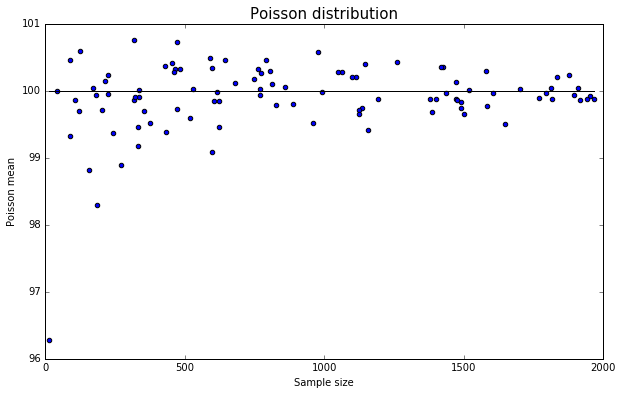

In [24]:
def poisrandom(df, s):
    return np.random.poisson(df, size = s).mean()

pois_mean = [poisrandom(df, s) for s in sample]

distributions['pois'] = pois_mean

pl.figure(figsize=(10, 6))
pl.scatter(sample, pois_mean)
pl.ylabel('Poisson mean')
pl.xlabel('Sample size')
pl.xlim(0,2000)
pl.title('Poisson distribution', size = 15)  
pl.plot([min(sample), max(sample)], [df, df], 'k')

In [48]:
print ('Figure2: The Poisson distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem')

Figure2: The Poisson distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem


Poisson mean:  99.9107328411
Standard deviation:  0.540409739274


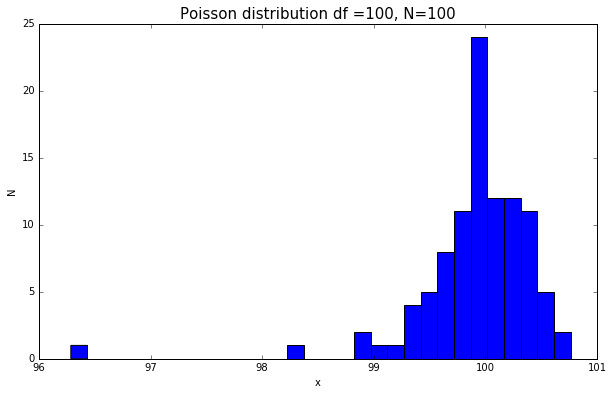

In [26]:
pl.figure(figsize=(10, 6))
pl.hist(distributions['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Poisson distribution df =100, N=100', size = 15) 
print ('Poisson mean: ', np.mean(distributions['pois']))
print ('Standard deviation: ', np.std(distributions['pois']))

Binomial Distribution 

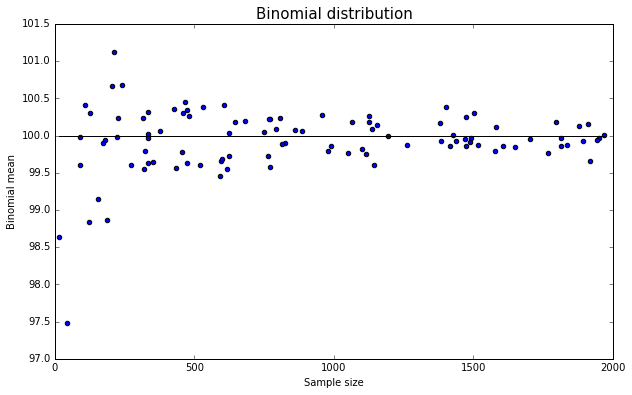

In [32]:
def binorandom(df, s):
    return np.random.binomial( 200, 0.5, size = s).mean()

bino_mean = [binorandom(df, s) for s in sample]

distributions['bino'] = bino_mean

pl.figure(figsize=(10, 6))
pl.scatter(sample, bino_mean)
pl.ylabel('Binomial mean')
pl.xlabel('Sample size')
pl.xlim(0,2000)
pl.title('Binomial distribution', size = 15)  
pl.plot([min(sample), max(sample)], [df, df], 'k')

In [49]:
print ('Figure 3: The Binomial distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem')

Figure 3: The Binomial distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem


Binomial mean:  99.9329062482
Standard deviation:  0.4333024516


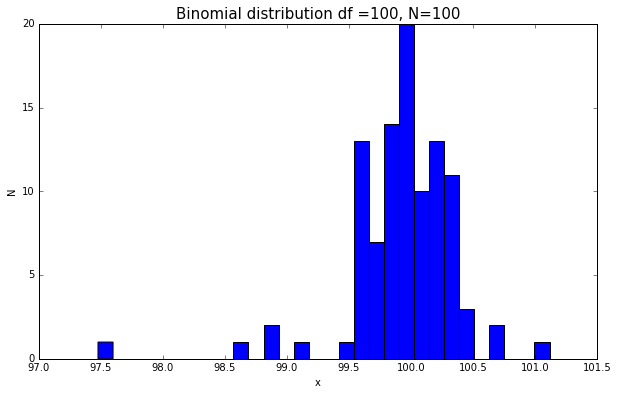

In [34]:
pl.figure(figsize=(10, 6))
pl.hist(distributions['bino'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Binomial distribution df =100, N=100', size = 15) 
print ('Binomial mean: ', np.mean(distributions['bino']))
print ('Standard deviation: ', np.std(distributions['bino']))

In [ ]:
Normal Distribution 

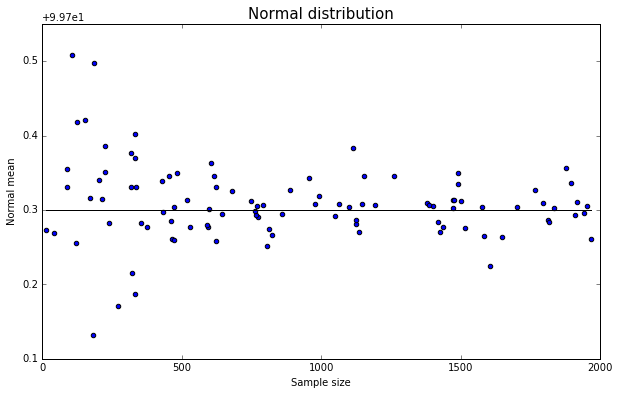

In [35]:
def normrandom(df, s):
    return np.random.normal( df, size = s).mean()

norm_mean = [normrandom(df, s) for s in sample]

distributions['norm'] = norm_mean

pl.figure(figsize=(10, 6))
pl.scatter(sample, norm_mean)
pl.ylabel('Normal mean')
pl.xlabel('Sample size')
pl.xlim(0,2000)
pl.title('Normal distribution', size = 15)  
pl.plot([min(sample), max(sample)], [df, df], 'k')

In [50]:
print ('Figure 4: The Normal distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem')

Figure 4: The Normal distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem


Normal mean:  100.008109515
Standard deviation:  0.052561760116


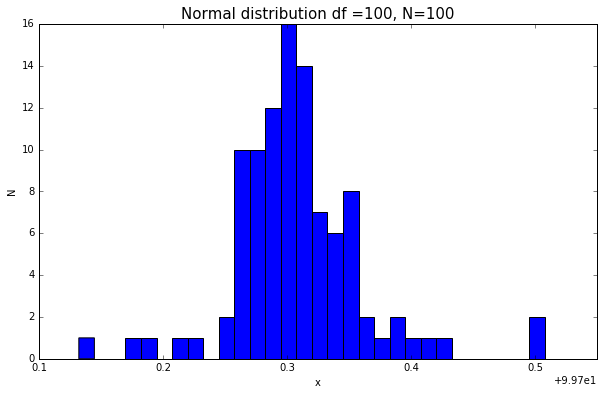

In [37]:
pl.figure(figsize=(10, 6))
pl.hist(distributions['norm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Normal distribution df =100, N=100', size = 15) 
print ('Normal mean: ', np.mean(distributions['norm']))
print ('Standard deviation: ', np.std(distributions['norm']))

Rayleigh Distribution 

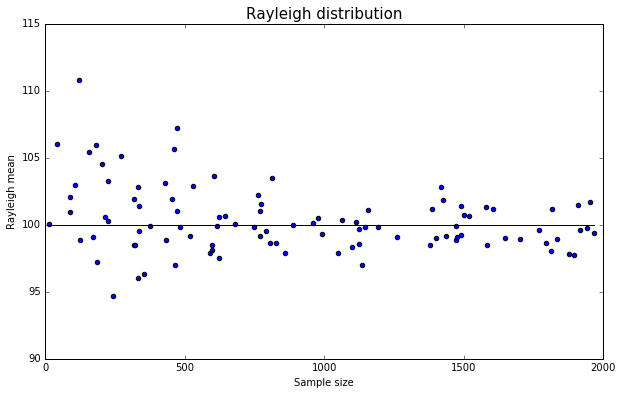

In [42]:
def raylrandom(df, s):
    return np.random.rayleigh( 0.8 * df, size = s).mean()

rayl_mean = [raylrandom(df, s) for s in sample]

distributions['rayl'] = rayl_mean

pl.figure(figsize=(10, 6))
pl.scatter(sample, rayl_mean)
pl.ylabel('Rayleigh mean')
pl.xlabel('Sample size')
pl.xlim(0,2000)
pl.title('Rayleigh distribution', size = 15)  
pl.plot([min(sample), max(sample)], [df, df], 'k')

In [51]:
print ('Figure 5: The Rayleigh distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem')

Figure 5: The Rayleigh distribution plot shows that as the number of observations in a sample size increases its mean tends to become closer to the mean of the population, further it also shows that multiple samples with similiar sample size tend to have their combined mean closer to the population mean. This is in agreement with the Central Limit Theorem


Rayliegh mean:  100.362397568
Standard deviation:  2.48466772371


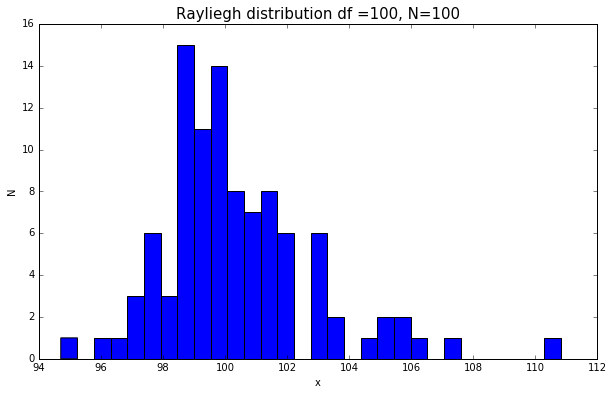

In [44]:
pl.figure(figsize=(10, 6))
pl.hist(distributions['rayl'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Rayliegh distribution df =100, N=100', size = 15) 
print ('Rayliegh mean: ', np.mean(distributions['rayl']))
print ('Standard deviation: ', np.std(distributions['rayl']))